# CS345 Fall 2024 Assignment 1

Last update: 8/30/2024

In [139]:
import numpy as np
from matplotlib import pyplot as plt

### Part 1:  generating labeled data

In this part of the assignment we will experiment with scikit-learn's functionality for creating toy datasets [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html).
Consider the following two datasets created as follows:

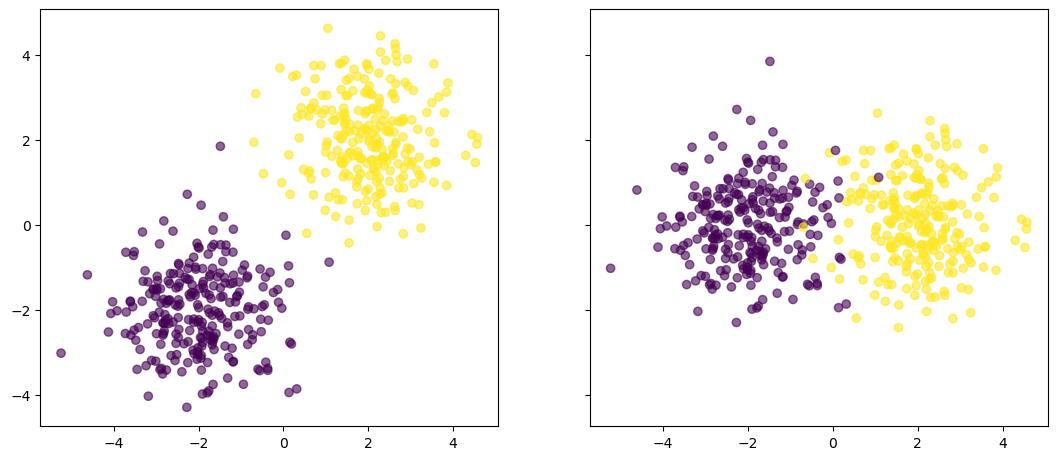

In [141]:
from sklearn.datasets import make_blobs

N = 500
seed = 42

# create the first dataset:
centers = [[-2,-2],[2,2]]
X1, y1 = make_blobs(n_samples=N, centers=centers, random_state=42)

# create the second dataset:
centers = [[-2,0],[2,0]]
X2, y2 = make_blobs(n_samples=N, centers=centers, random_state=42)

fig, (ax1,ax2) = plt.subplots(1, 2, sharey='row', figsize=(13,6))
ax1.scatter(X1[:, 0], X1[:, 1], c=y1, alpha=0.6);
ax1.set_aspect('equal')
ax2.scatter(X2[:, 0], X2[:, 1], c=y2, alpha=0.6);
ax2.set_aspect('equal')


#### Feature visualization

Plot histograms of the individual features in each of the two datasets generated above, color-coded by class, similarly to the way we visualized the iris dataset in our first notebook on labeled data.  Use matplotlib's [hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) function to generate the histogram and use the ''density=True'' option to generated a histogram normalized to be a distribution.
In plotting, use [subplots](http://matplotlib.org/examples/pylab_examples/subplots_demo.html), as a convenient way of grouping together related plots as we did above.

Comment on the differences between the histograms, and relate them to the parameters provided to `make_blobs`.  More specifically, explain why the 2nd feature of the dataset shown on the right (shown in the y-axis above), is not useful for classification purposes, and what is it about the parameters provided to `make_blobs` that made it so.

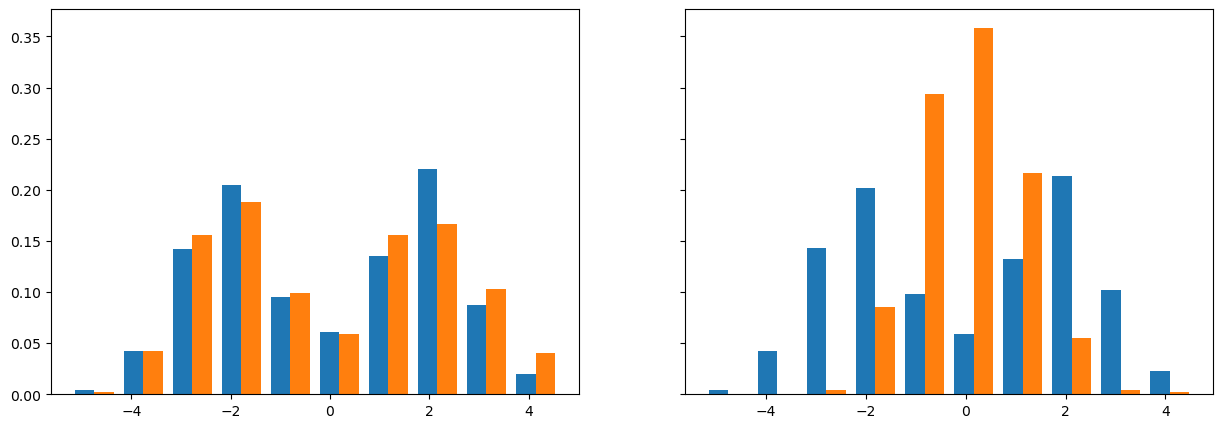

In [311]:
# your code here
fig, (ax1,ax2) = plt.subplots(1, 2, sharey='row', figsize=(15,5))
ax1.hist(X1, density=True);
ax2.hist(X2, density=True);

*In Plot 1, the two data sets are centered and uniformly distributed around (-2,-2) and (2,2) respectively due to the Gaussian nature of make_blobs. The same can be said for plot 2, but the centers are (-2,0) and (2, 0). The second plot is harder to classify due to both centers sharing the same y value and not being distributed far enough apart on the x-axis when using the make_blobs function*.

### Part 2:  Exploring the Palmer Penguins dataset

In this part of the assignment we will analyze the [Palmer Penguins dataset](https://github.com/allisonhorst/palmerpenguins/), which measures the characteristics of three species of penguins:

<img style="padding: 10px; float:center;" alt="broadcasting" src="https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png" width="500">

The data contains multiple characteristics of a penguin:  its species,  sex, the island on which it was observed, and other measurments.
We will be interested in looking at four specific characteristics:
bill length, bill depth, flipper length, and body mass.

<img style="padding: 10px; float:center;" alt="broadcasting" src="https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png" width="400">


#### Reading the data

The dataset is stored in three CSV files, one for each species of penguins.
We will use NumPy's [genfromtxt](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html) to read the CSV files directly from the URL in which they are stored without having to first download the data to your computer.
The following command will read in the data for the four characteristics we are interested in for the Adelie species of penguins:

In [199]:
import pandas as pd
adelie_data_url = "https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.219.5&entityid=002f3893385f710df69eeebe893144ff"
#adelie_data=np.genfromtxt(adelie_data_url, delimiter=',', usecols=range(10,14), 
#                          skip_header=True)
X_adelie = pd.read_csv(adelie_data_url, usecols=range(9,13)).values
print(X_adelie.shape)

(152, 4)


In [201]:
X_adelie = X_adelie[~np.isnan(X_adelie)]
X_adelie = X_adelie.reshape((-1,4))
print(X_adelie.shape)

(151, 4)


If you put that URL in your browser, this will download a CSV file to your computer.  We recommend doing that so you can see how the data file looks like.
Also note that the data contains missing values, which results in `NaN` values in the resulting data matrix.  Remove all examples for which one or more of the feature values are `NaN`.  For that purpose, use [np.isnan](https://numpy.org/doc/stable/reference/generated/numpy.isnan.html) along with Boolean indexing.
Here are commands for loading the data for the other species of penguins (we used the pandas csv reader rather than the NumPy version since the NumPy one has an issue when reading multiple datasets from the same web server):

In [203]:
gentoo_data_url = "https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.220.5&entityid=e03b43c924f226486f2f0ab6709d2381"
chinstrap_data_url = "https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.221.6&entityid=fe853aa8f7a59aa84cdd3197619ef462"
#gentoo_data = np.genfromtxt(gentoo_data_url, delimiter=',', usecols=range(10,14), 
#                          skip_header=True)
#chinstrap_data = np.genfromtxt(chinstrap_data_url, delimiter=',', usecols=range(10,14), 
#                          skip_header=True)
X_gentoo = pd.read_csv(gentoo_data_url, usecols=range(9,13)).values
X_chinstrap = pd.read_csv(chinstrap_data_url, usecols=range(9,13)).values

In [204]:
print(X_chinstrap.shape,X_gentoo.shape)
X_gentoo = X_gentoo[~np.isnan(X_gentoo)]
X_gentoo = X_gentoo.reshape((-1,4))
X_chinstrap = X_chinstrap[~np.isnan(X_chinstrap)]
X_chinstrap = X_chinstrap.reshape((-1,4))
print(X_chinstrap.shape,X_gentoo.shape)

(68, 4) (124, 4)
(68, 4) (123, 4)


### Creating a labeled dataset

Your first task is to create a labeled dataset from the three CSV files in the links above with a class label that represents the species of a penguin; in other words, you will need to combine the three feature matrices into a single feature matrix and create a label array which indicates for each row in the combined matrix which species of penguin it is.  Use the numbers 0,1,2 to represent the species Adelie, Gentoo, and Chinstrap, respectively.
Similar to how scikit-learn packages the iris dataset using a function [load_iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html), we ask that you write a function called `load_penguins` with the following behavior:

In [207]:
def load_penguins() :
    """
    returns a two dimensional array representing the feature matrix
    of the data and a one dimensional array that contains the lables
    
    Example usage:
    X,y = load_penguins()
    the array X is a two dimensional array and y is a one dimensional 
    array such that y[i] is the label for X[i]
    0 = Adelie
    1 = Gentoo
    2 = Chinstrap
    """
    features = np.vstack((X_adelie, X_gentoo, X_chinstrap))
    
    adelie = np.full(len(X_adelie), 0)
    gentoo = np.full(len(X_gentoo), 1)
    chinstrap = np.full(len(X_chinstrap), 2)

    labels = np.hstack((adelie, gentoo, chinstrap))

    return (features, labels)

In [303]:
X, y = load_penguins()

# your code had better pass the following tests:
try :
    # the feature matrix matches the vector of labels in length:
    assert len(X) == len(y)
    # the number of features is equal to 4:
    assert len(X[0]) == 4
    # missing values have been removed:
    assert np.sum(np.isnan(X)) == 0
except :
    print("there are some issues in your data")

print(X.shape, y.shape)

(342, 4) (342,)


### Feature visualization


As described above, your dataset will contain the following four features:
culmen length, culmen width, flipper length, and body mass.
Suppose you wanted to design a machine learning algorithm that predicts the species of a penguin based on two out of the four features, and for simplicity assume you need to choose between the following combinations:
culmen length and culmen width or flipper length and body mass.
Visualize the data using scatter plots color-coded by species of penguin to make that decision.  Use Matplotlib's [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) function for this purpose (overall, you will generate two scatter plots - one for each of the two feature combinations specified above).
Explain your choice!
Now, what is the single most predictive feature among the four?
To determine that, plot histograms of the four features color coded by species like we did for the iris dataset using Matplotlib's [hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) function.
In plotting, use [subplots](http://matplotlib.org/examples/pylab_examples/subplots_demo.html), as a convenient way of grouping together related plots.


I would say that the combination of Culmen Length and Culmen width would be the best feature pairing. The scatter plots show three distinct groups with that pairing versus the flipper length and body mass pairing that shows two overlapping groups.

I could not figure out how to get the histogram data to display correctly (color coded by species).

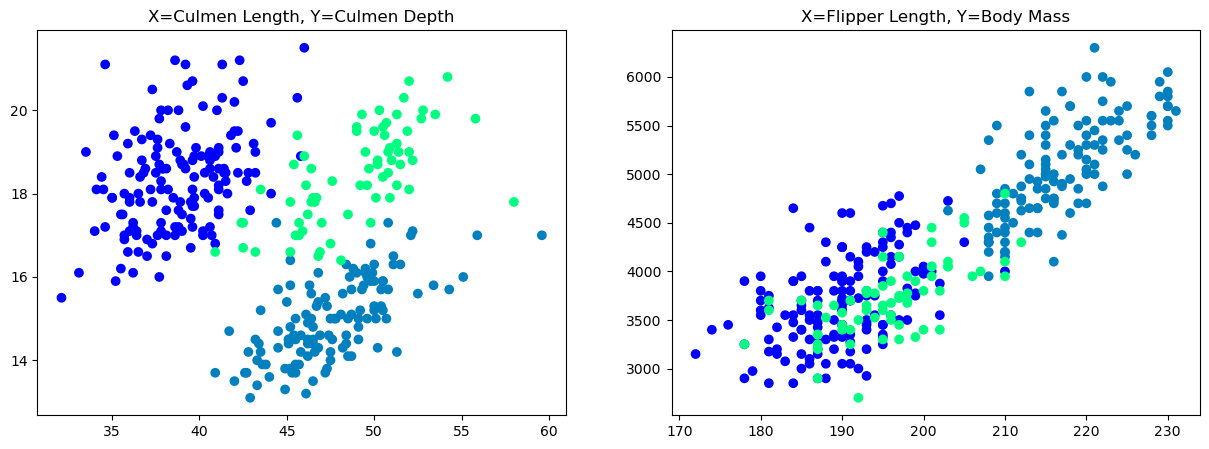

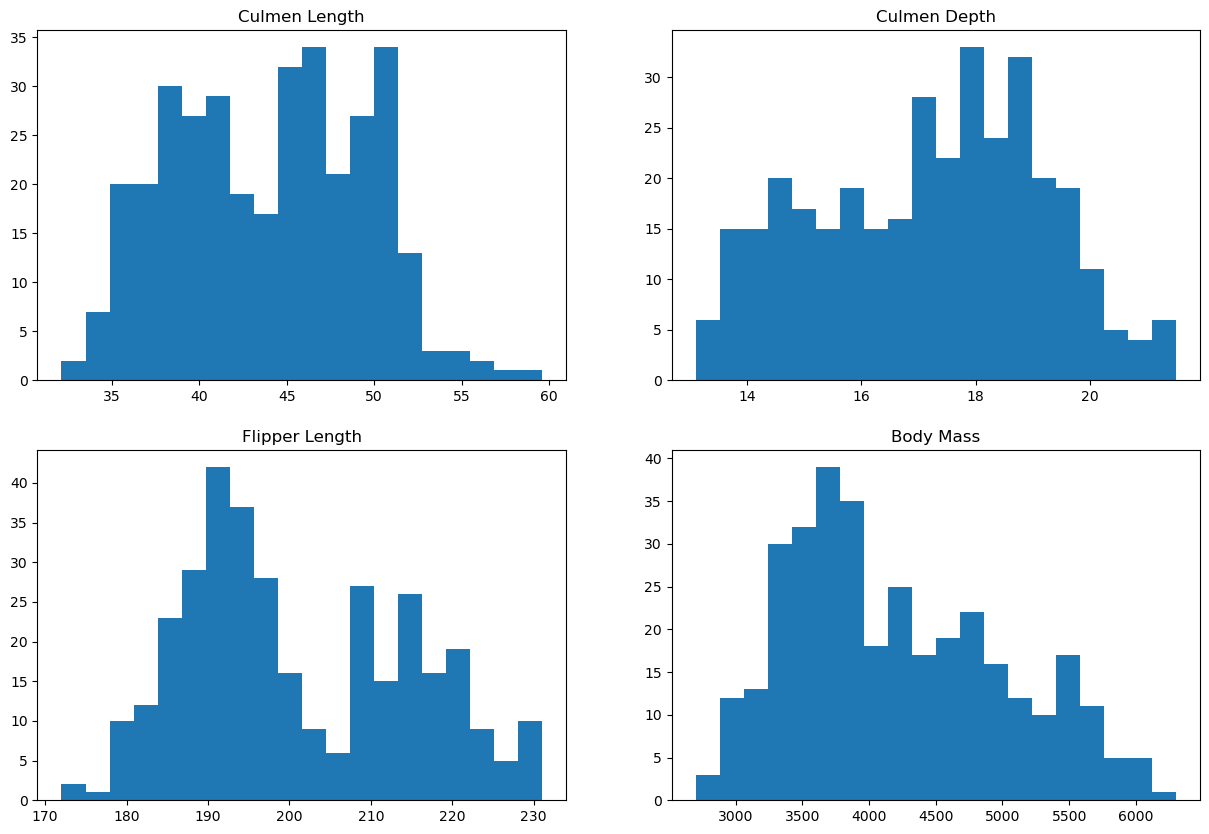

In [404]:
# it should include relevant plots and the Python code to generate them
"""
Culmen Length column 0
Culmen Depth column 1
Flipper Length column 2
Body Mass column 3
"""
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.title.set_text("X=Culmen Length, Y=Culmen Depth") 
ax1.scatter(X[:,0], X[:,1], c=y, cmap='winter')

ax2.title.set_text("X=Flipper Length, Y=Body Mass")
ax2.scatter(X[:,2], X[:,3], c=y, cmap='winter')

fig, ax3 = plt.subplots(2,2, figsize=(15,10))
colors = ['blue', 'green', 'orange', 'purple']  

ax3[0,0].title.set_text("Culmen Length")
ax3[0,0].hist(X[:,0], bins=20, label=y);

ax3[0,1].title.set_text("Culmen Depth")
ax3[0,1].hist(X[:,1], bins=20, label=y);

ax3[1,0].title.set_text("Flipper Length")
ax3[1,0].hist(X[:,2], bins=20, label=y);

ax3[1,1].title.set_text("Body Mass")
ax3[1,1].hist(X[:,3], bins=20, label=y);

### Part 3:  Splitting data into train and test sets

Whenever you train and evaluate a machine learning classifier, you need to split your data into separate training and test sets.  The classifier is trained on the training set, and its accuracy is evaluated on the test set.

Suppose that your dataset is stored in arrays X and y where X is a two dimensional array that stores the features and y is an array that stores the labels.
In other words `X[i]` is a vector of features whose label is stored in `y[i]`.

Splitting the dataset into train and test sets means you need to generate two subsets of the data:
```Python
X_train, y_train
X_test, y_test
```
where the examples in the original dataset are randomly distributed between the training and test set.  
The best way to understand exactly what is expected, is to study the correct implementation we provide below.
We also note that scikit-learn also provides this functionality with [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
In this question we will provide you several potential implementations.  The first one is correct and is provided as a reference that will also help you understand the concept.  For each one of the rest, you will need to indicate whether it is correct or not and answer a few additional questions.

Each of the implementations uses the NumPy [permutation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html) or [shuffle](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html) functions to randomly reorder the data.

First here's the formal description of the function:

In [391]:
def train_test_split(X, y, test_fraction=0.2, seed=42):
    """
    split the given dataset into training and test sets
    
    arguments:
        X - two dimensional NumPy array that contains the feature matrix
        y - a NumPy array that contains the labels
        test_fraction - the fraction of data to be used as the test set.
        This is a number between 0 and 1.
        seed - random number generator seed that allows to create
        reproducible results
    
    return value:
        the function returns a tuple of four NumPy arrays:
        X_train,y_train,X_test,y_test where X_train,y_train are 
        the features and labels for the training set and X_test,y_test
        are the features and labels for the test set.
    """
    
    return (np.random.rand(8, 2),
            np.random.randint(0, 2,size=(8,)),
            np.random.rand(2, 2),
            np.random.randint(0, 2,size=(2,)))

# example function call:  
X_train,y_train,X_test,y_test = train_test_split(X, y, 0.2)

Next, here are the four implementations:

In [161]:
# correct implementaton of train_test_split

def train_test_split1(X, y, test_fraction=0.2, seed=42):
    rng = np.random.default_rng(seed)
    train_len = round(len(X)*(1-test_fraction))
    # generate a permutation of the numbers 0 ... len(X)-1 which are
    # the possible indices for the data
    rand_ind = np.random.permutation(len(X))
    # choose 0 ... train_len-1 as the indices for the training set
    train_ind = rand_ind[:train_len]
    # the rest belong in the test set
    test_ind = rand_ind[train_len:]

    return X[train_ind], y[train_ind], X[test_ind], y[test_ind]


In [162]:
def train_test_split2(X, y, test_fraction=0.2, seed=42):
    X_copy = X.copy()
    y_copy = y.copy()
    test_len = round(len(X) * test_fraction)
    rng = np.random.default_rng(seed)
    # as its name suggest, rng.shuffle randomly shuffles its input array
    # shuffle the rows of X_copy:
    rng.shuffle(X_copy)
    # shuffle y_copy:
    rng.shuffle(y_copy)
    # choose an appropriately sized subset for the test set:
    X_test = X_copy[:test_len]
    y_test = y_copy[:test_len]
    # choose the rest for the training set:
    X_train = X_copy[test_len:]
    y_train = y_copy[test_len:]
    return X_train, y_train, X_test, y_test


In [163]:
def train_test_split3(X, y, test_fraction=0.2, seed=42):
    test_len = round(len(X) * test_fraction)
    test_examples = np.zeros(len(X))
    test_examples[:test_len] = 1
    rng = np.random.default_rng(seed)
    rng.shuffle(test_examples)    
    return (X[test_examples==0],
            y[test_examples==0],
            X[test_examples==1],
            y[test_examples==1])


In [381]:
def train_test_split4(X, y, test_fraction=0.2, seed=42):
    combined = np.hstack((X, y[:,np.newaxis]))
    # in the above y[:,np.newaxis] treats y as a two dimensional array
    # so it can be stacked with with the matrix X
    # this can be done with reshape as well
    rng = np.random.default_rng(seed)
    rng.shuffle(combined)
    split_point = round(len(combined)*test_fraction)
    te,tr = combined[:split_point], combined[split_point:]
    
    return (tr[:,:-1],tr[:,-1],te[:,:-1],te[:,-1])


Answer the following:

*Is train_test_split2 correct?*  If not, explain what the problem is.

*Is train_test_split3 correct?*  If not, explain what the problem is.

*Is train_test_split4 correct?*  If not, explain what the problem is.


**Is train_test_split2 correct?** No, it shuffles the features and labels in separate random actions, so the labels are no longer correlated to the correct features. 

**Is train_test_split3 correct?** Yes, this should work since features and labels used the same shuffle, and the proportions of test to train values were indexed correctly when returning values.

**Is train_test_split4 correct?** Yes, the labels are paired in the same matrix as the features, then shuffled together. The -1 indexing excludes the labels column for the X_train and X_test arrays while including the labels for y_train and y_test arrays

In the following code cell we created data for a binary classification problem using the scikit-learn's make_blobs.  Explain the differences between the two plots and how they are related to the correctness of the implementations.

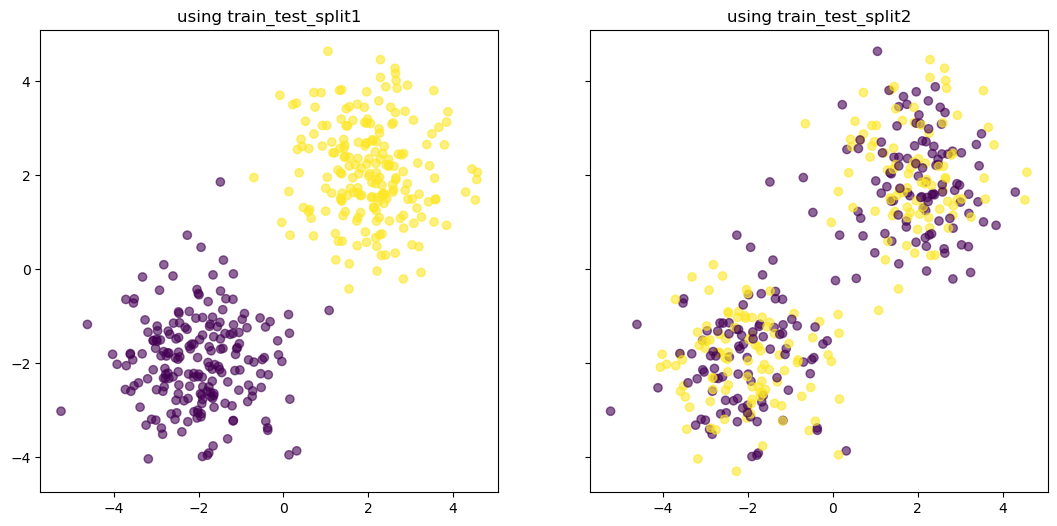

In [168]:
from sklearn.datasets import make_blobs

N = 500
seed = 42

centers = [[-2,-2],[2,2]]
X, y = make_blobs(n_samples=N, centers=centers, random_state=seed)

X_train1,y_train1,X_test1,y_test1 = train_test_split1(X, y, 0.2, seed)

fig, (ax1,ax2) = plt.subplots(1, 2, sharey='row', figsize=(13,6))
ax1.scatter(X_train1[:, 0], X_train1[:, 1], c=y_train1, alpha=0.6);
ax1.set_title('using train_test_split1')

X_train2,y_train2,X_test2,y_test2 = train_test_split2(X, y, 0.2, seed)
ax2.scatter(X_train2[:, 0], X_train2[:, 1], c=y_train2, alpha=0.6);
ax2.set_title('using train_test_split2');


The first plot with train_test_split_1 shows that this implementation is incorrect, the samples are not randomly shuffled as they should be when the data sets are supposedly split up.

The second plot shows an expected implementation. The samples from each data set are mixed together and shows that they were successfully split up.

### Part 4:  Use of AI and other web resources

In the cell below indicate in detail how you used AI and other web resources for this assignment.  If you used AI tools, indicate how useful they were.

I mostly googled for numpy and matplotlib functions to figure out how to come up with the answers I needed. I mainly read the associated documentation for the functions and also looked at related questions that popped up on Stack Overflow on my google search if it made sense with the problems I was trying to solve.

### Your Report

Please answer the questions in the cells reserved for that purpose.  


### Submission

Submit your report as a Jupyter notebook via Canvas. Running the notebook should generate all the plots in your notebook.

### Grading 

Although we will not grade on a 100 pt scale, the following is a grading sheet that will help you in doing that:  

```
Grading sheet for assignment 1

Part 1:  20 points.
Part 2:  40 points.
  Assembling the data:  20 pts
  Creation of histograms/scatterplots of features: 10 points
  Discussion of the plots: 10 points
Part 3:  40 points
```

Points will be taken off if Part 4 is not completed.

Grading will be based on the following criteria:

  * Code correctness.
  * Plots are well formatted and easy to understand.
  * Interesting and meaningful observations made where requested.
  * Notebook is readable, well-organized, and concise.